In [2]:
# Initialization

import math
from datetime import datetime
import openpyxl as opxl
from openpyxl.utils.dataframe import dataframe_to_rows
import pandas as pd
import numpy as np
from IPython.core.display import HTML
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import plotly.graph_objects as go

import sklearn.metrics
import scipy.integrate as integrate
import scipy.optimize as sco

import fluids as fds
import ht 

import general as gen
import model as ty
import proc as pr
import heat_transfer as bht
# importing sys
import sys
sys.path.insert(0,r'C:\Users\valen\Dropbox (DualSun)\PC\Documents\GitHub\RD-systems-and-test-benches\thermal')
import SK_standard as sk

In [10]:
input_name = r'\Inputs_Triple_Solar.xlsx'
hyp_name = r'\Model_hypotheses_TS.xlsx'
data_name = r'\221228_TUV_test_conditions_TS_dark_front.xlsx'

par = pr.import_input(r'G:\Drive partagés\BU04-Innovation\PVT-perf-1Dmodel\Inputs',input_name)
hyp = pr.create_dict_from_excel(r'G:\Drive partagés\BU04-Innovation\PVT-perf-1Dmodel\Hypotheses',hyp_name,'Main')
condi = pr.create_inputs_from_excel(r'G:\Drive partagés\BU04-Innovation\PVT-perf-1Dmodel\Steady-state conditions inputs'+data_name,par,hyp)

{'exchanger': {'name': 'xxx', 'eta_nom': 0.201, 'Eff_T': -0.0034000000000000002, 'T_ref': 298.15, 'Eff_G': 0, 'G_ref': 1000, 'X_corr': 1, 'tau_alpha': 0.8, 'eps': 0.95, 'eps_bs': 1, 'w_pan': 1.043, 'L_pan': 2.087, 'orientation': 'landscape', 'lambd_upper_glass': 0.00278, 'lambd_upper_EVA': 0.000515, 'lambd_si': 0.00015, 'lambd_lower_EVA': 0.000515, 'lambd_PVDF': 2.9999999999999997e-05, 'lambd_PET': 0.0, 'lambd_adh': 0.0, 'lambd_lower_glass': 0.0, 'k_glass': 0.8, 'k_EVA': 0.24, 'k_si': 60, 'k_PVDF': 0.2, 'k_PET': 0.3, 'k_adh': 0.2, 'L_abs': 2.087, 'w_abs': 1.003, 'geometry': 'meander', 'N_harp': 1, 'N_meander': 12, 'L_tube': 2.0, 'tube_geometry': 'circular', 'H_tube': 0.015, 'w_tube': 0.015, 'W': 0.08358333333333333, 'l_c': 0.0, 'p_ext_tube': 0.047123889803846894, 'p_ext_tube_rad': 0.023561944901923447, 'lambd_air': 0.0, 'lambd_conductive_plate': 0.0, 'lambd_abs': 0.00027, 'lambd_riser_plate': 0.0, 'lambd_riser_back': 0.00035, 'lambd_ins': 0.0, 'eps_he': 0.9, 'eps_ins': 0.8, 'k_air': 0.

In [3]:
df_res,X,list_res,list_df,list_df_historic = ty.simu_condi(par,hyp,condi)

In [4]:
pr.disp_html(list_df[0])

,mdot,G,Gp,T_amb,u,h_top,h_back,h_rad_back,h_back_tube,h_rad_back_tube,h_back_fins,h_rad_f,h_fluid,Cp,T_PV0,T_PV,Slice,T_fluid_in,T_tube_mean,Bi_f0,gamma_0_int,Bi_f1,gamma_1_int,gamma_2_int,h_rad,X_celltemp,eta_PV,S,Fp,j,m,b,c0,c2,e1,e2,e3,b1,b2,b3,Ka_Bt,Th_Bt,Ep_Bt,d1,d2,d3,Ka_tf,Th_tf,Ep_tf,a_f,b_f,T_fluid_out,q_tube_fluid,T_fluid_mean,T_Base_mean,T_absfin_mean,T_abs_mean,Q_tube_back,Q_absfin_back,T_ins_tube_mean,T_ins_absfin_mean,T_ins_mean,Q_ins_conv,Q_ins_rad,T_PV_Base_mean,T_PV_absfin_mean,qp_PV_Base,qp_Base_back,qp_fin,Q_top_conv,Q_top_rad,Q_PV_plate,Q_PV_Base,Q_PV_absfin,Q_Base_back,Q_tube_fluid,Q_Base_tube,Q_absfins_Base,Q_abs_back2,Q_fluid_back,Q_tube_back_conv,Q_tube_back_rad,Q_ins_tube_back_conv,Q_ins_tube_back_rad,Q_ins_absfin_back_conv,Q_ins_absfin_back_rad,Q_f01,power_balance_1,power_balance_3,qp_f0,qp_f1
row,0.05082,1000.0,4,303.449,0.59,7.435752,1.822259,6.567755,5.536096,5.606858,0.766828,64.648079,1836.677647,4182.222890,333.011268,333.011271,0,299.144000,299.994476,0.000002,0.196254,0.000002,0.186731,0,6.958674,0.881472,0.177176,658.259352,0.956861,22.864385,519.710676,7596.434139,88.982714,0.027323,0.017118,0.972677,0.010205,0.674939,1.596155,-0.596155,-0.134385,0.056825,43.202986,1.481614,-2.364887,0.883272,-0.134385,0.056825,43.202986,-0.011127,3.577095,299.635695,52.252549,299.390759,332.238725,332.238725,332.238726,-3.627936,40.378470,299.994476,332.238725,387.332427,305.714616,1101.851518,333.01127,333.011271,0.0,0.0,-3.110786e-14,35.271996,34.388559,40.378467,0.0,40.378508,0.0,104.505099,98.231102,-1.244315e-13,-40.378467,-4.217708,-1.802449,-1.825488,-1.802449,-1.825488,8.769953,31.608517,-2.646062,-6.821210e-13,-100.287391,-0.796447,-0.757798
row,0.05082,1000.0,4,303.449,0.59,7.435752,1.822259,6.567755,5.384474,5.620019,0.729840,64.788284,1836.677647,4181.954182,333.011270,333.011270,1,299.635695,300.467943,0.000002,0.186840,0.000002,0.177770,0,6.958674,0.881472,0.177176,658.259354,0.956861,22.864385,519.710679,7596.434231,88.961117,0.027087,0.017160,0.972913,0.009928,0.673315,1.578554,-0.578554,-0.132903,0.056689,42.753291,1.485188,-2.344449,0.859261,-0.132903,0.056689,42.753291,-0.011031,3.548628,300.116877,51.132127,299.877171,332.238724,332.238724,332.238725,-3.091801,40.378469,300.467943,332.238724,387.419378,306.031524,1102.993682,333.01127,333.011270,0.0,0.0,9.093068e-14,35.271996,34.388559,40.378467,0.0,40.378509,0.0,102.264255,96.998611,3.637227e-13,-40.378467,-3.667100,-1.512811,-1.578990,-1.512811,-1.578990,8.769953,31.608516,-2.173844,-1.065814e-13,-98.597155,-0.667360,-0.634962
row,0.05082,1000.0,4,303.449,0.59,7.435752,1.822259,6.567755,5.215761,5.632932,0.692996,64.925843,1836.677647,4181.700887,333.011270,333.011270,2,300.116877,300.931549,0.000002,0.177457,0.000002,0.168839,0,6.958674,0.881472,0.177176,658.259354,0.956861,22.864385,519.710679,7596.434231,88.938702,0.026842,0.017200,0.973158,0.009642,0.671720,1.560557,-0.560557,-0.131388,0.056554,42.293505,1.488717,-2.323227,0.834510,-0.131388,0.056554,42.293505,-0.010932,3.519017,300.587923,50.051850,300.353258,332.238724,332.238724,332.238725,-2.574007,40.378469,300.931549,332.238724,387.504519,306.341821,1104.112050,333.01127,333.011270,0.0,0.0,-5.742990e-14,35.271996,34.388559,40.378467,0.0,40.378509,0.0,100.103700,95.786129,-2.297196e-13,-40.378467,-3.134235,-1.237513,-1.336493,-1.237513,-1.336493,8.769953,31.608516,-1.743564,1.520561e-12,-96.969464,-0.549361,-0.522681
row,0.05082,1000.0,4,303.449,0.59,7.435752,1.822259,6.567755,5.024028,5.645607,0.656575,65.060847,1836.677647,4181.462130,333.011270,333.011270,3,300.587923,301.385659,0.000002,0.168177,0.000001,0.160006,0,6.958674,0.881472,0.177176,658.259354,0.956861,22.864385,519.710679,7596.434231,88.915332,0.026586,0.017241,0.973414,0.009346,0.670150,1.542073,-0.542073,-0.129832,0.056422,41.821281,1.492204,-2.301088,0.808884,-0.129832,0.056422,41.821281,-0.010829,3.488077,301.049199,49.011106,300.819393,332.238724,332.238724,332.238725,-2.074873,40.378469,301.385659,332.2387

In [5]:
pr.disp_html(df_res)

,G,-(T_m - T_a),-(T_m - T_a)^2,-up x (T_m - T_a),Gp,dT_m/dt,up x G,up x Gp,-(T_m - T_a)^4,mdot,T_amb,u,h_top,h_back,h_rad_back,h_back_tube,h_rad_back_tube,h_back_fins,h_rad_f,h_fluid,T_PV,T_fluid_in,T_tube_mean,h_rad,X_celltemp,eta_PV,S,T_fluid_out,T_fluid_mean,T_Base_mean,T_absfin_mean,T_abs_mean,Q_absfin_back,T_ins_tube_mean,T_ins_absfin_mean,T_ins_mean,T_PV_Base_mean,T_PV_absfin_mean,Q_top_conv,Q_top_rad,Q_PV_plate,Q_PV_Base,Q_PV_absfin,Q_tube_fluid,Q_Base_tube,Q_absfins_Base,Q_tube_back_conv,Q_tube_back_rad,Q_ins_tube_back_conv,Q_ins_tube_back_rad,Q_ins_absfin_back_conv,Q_ins_absfin_back_rad,Q_f01,Q_S,DT,T_m,T_m en °C,Cp(T),Qdot,Qdot / AG
0,1000.0,1.663033,0.0,-4.007910,0.0,0.0,2410.0,9.64,-7.648982,0.05082,303.449,0.59,7.435752,1.822259,6.567755,4.479544,5.675047,0.613589,65.374334,1836.677647,333.011270,299.144,302.432128,6.958674,0.881472,0.177176,658.259354,304.427934,301.891634,332.238724,332.238724,332.238725,484.541629,302.432128,332.238724,387.780099,333.011270,333.011270,423.263953,412.662705,484.541605,0.0,484.542105,1122.733462,1101.529028,-8.614486e-14,-6.078955,-6.457015,-6.078955,-6.457015,105.239433,379.302196,-8.668465,110.039022,5.283934,301.785967,28.635967,4179.991213,1122.450990,515.656658
1,1000.0,1.890124,0.0,-4.555198,0.0,0.0,2410.0,9.64,-12.763243,0.05084,303.713,0.59,7.434313,1.819458,6.583144,4.536218,5.683743,0.621659,65.462213,1837.527631,333.245329,299.151,302.477073,6.974970,0.880676,0.177016,658.387318,304.494752,301.930500,332.472438,332.472438,332.472439,484.758155,302.477073,332.472438,388.022067,333.245328,333.245329,422.756707,413.210123,484.758131,0.0,484.758631,1135.886277,1109.989625,1.321681e-12,-7.408350,-7.873541,-7.408350,-7.873541,104.967140,379.791014,-10.614764,110.060413,5.343752,301.822876,28.672876,4179.978380,1135.601349,521.697965
2,1000.0,1.395821,0.0,-1.549362,0.0,0.0,1110.0,4.44,-3.795939,0.05086,302.727,1.89,12.386544,1.696799,6.384085,4.315642,5.639002,0.998421,63.588719,1838.067067,327.724789,299.150,301.870351,6.759500,0.899446,0.180789,655.369129,303.512357,301.424090,327.094989,327.094989,327.094990,395.011249,301.870351,327.094989,382.533194,327.724788,327.724789,580.700316,338.958935,395.011221,0.0,395.011713,927.690222,906.793481,-8.354554e-13,-4.940921,-5.416214,-4.940921,-5.416214,82.943225,312.068025,-10.539606,109.555873,4.362357,301.331179,28.181179,4180.154240,927.448722,426.072152
3,1000.0,1.553848,0.0,-1.724771,0.0,0.0,1110.0,4.44,-5.829537,0.05085,302.916,1.89,12.386338,1.694974,6.395079,4.372129,5.645331,1.000841,63.653487,1838.088581,327.898185,299.158,301.907247,6.771138,0.898856,0.180670,655.463927,303.566304,301.456381,327.268081,327.268081,327.268082,395.201296,301.907247,327.268081,382.713062,327.898184,327.898185,580.328809,339.330561,395.201268,0.0,395.201760,937.273653,912.614441,-8.151378e-13,-5.830985,-6.392476,-5.830985,-6.392476,82.799941,312.401355,-12.435752,109.571720,4.408304,301.362152,28.212152,4180.142847,937.030289,430.473946
4,1000.0,1.062207,0.0,0.562970,0.0,0.0,-530.0,-2.12,-1.273026,0.05091,302.070,3.53,16.769081,1.608446,6.256388,4.196271,5.609646,1.448879,62.391234,1838.929565,324.131059,299.135,301.477430,6.621506,0.911664,0.183245,653.404364,302.880585,301.094053,323.589742,323.589742,323.589743,339.513901,301.477430,323.589742,378.955788,324.131058,324.131059,678.183975,293.031311,339.513869,0.0,339.514355,797.340196,779.972882,7.302967e-13,-3.318568,-3.725002,-3.318568,-3.725002,69.434358,270.079543,-10.323744,109.227430,3.745585,301.007793,27.857793,4180.275753,797.127343,366.202200
5,1000.0,1.128294,0.0,0.597996,0.0,0.0,-530.0,-2.12,-1.620650,0.05091,302.139,3.53,16.769073,1.607828,6.260389,4.212017,5.611726,1.449258,62.412621,1838.657541,324.195707,299.128,301.482959,6.625739,0.911445,0.183200,653.439709,302.893412,301.097495,323.654271,323.654271,323.654271,339.589354,301.482959,323.654271,379.021331,324.195706,324.195707,678.049897,293.160837,339.589322,0.0,339.589808,801.560535,782.320664,-6.322759e-13,-3.679038,-4

In [12]:
[tab,X] = sk.find_SK(condi,par['AG'],columns_list=[0,1,0,1,0,0,0,0,0])
X_df = pd.DataFrame(X[0],index = ['eta0,hem','a1','a2','a3','a4','a5','a6','a7','a8'],columns=['TÜV'])
pr.disp_html(X_df)

,TÜV
"eta0,hem",0.000000
a1,27.216332
a2,0.000000
a3,2.804152
a4,0.000000
a5,0.000000
a6,0.000000
a7,0.000000
a8,0.000000


In [6]:
[tab,X] = sk.find_SK_SST(condi,par['AG'],columns_list=[1,1,0,1,0,0,1,0,0])
X_df = pd.DataFrame(X[0],index = ['eta0,hem','a1','a2','a3','a4','a5','a6','a7','a8'],columns=['TÜV'])

[tab_m,X_m] = sk.find_SK_SST(df_res,par['AG'],columns_list=[1,1,0,1,0,0,1,0,0])
X_df['Linear fit model 1D'] = X_m[0]

pr.disp_html(X_df)

,TÜV,Linear fit model 1D
"eta0,hem",0.342393,0.356690
a1,26.990449,30.475943
a2,0.000000,0.000000
a3,1.404607,0.743709
a4,0.000000,0.000000
a5,0.000000,0.000000
a6,0.013172,0.046340
a7,0.000000,0.000000
a8,0.000000,0.000000


In [7]:
pr.disp_html(df_res)

,G,-(T_m - T_a),-(T_m - T_a)^2,-up x (T_m - T_a),Gp,dT_m/dt,up x G,up x Gp,-(T_m - T_a)^4,mdot,T_amb,u,h_top,h_back,h_rad_back,h_back_tube,h_rad_back_tube,h_back_fins,h_rad_f,h_fluid,T_PV,T_fluid_in,T_tube_mean,h_rad,X_celltemp,eta_PV,S,T_fluid_out,T_fluid_mean,T_Base_mean,T_absfin_mean,T_abs_mean,Q_absfin_back,T_ins_tube_mean,T_ins_absfin_mean,T_ins_mean,T_PV_Base_mean,T_PV_absfin_mean,Q_top_conv,Q_top_rad,Q_PV_plate,Q_PV_Base,Q_PV_absfin,Q_tube_fluid,Q_Base_tube,Q_absfins_Base,Q_tube_back_conv,Q_tube_back_rad,Q_ins_tube_back_conv,Q_ins_tube_back_rad,Q_ins_absfin_back_conv,Q_ins_absfin_back_rad,Q_f01,Q_S,DT,T_m,T_m en °C,Cp(T),Qdot,Qdot / AG
0,1000.0,1.663033,0.0,-4.007910,0.0,0.0,2410.0,9.64,-7.648982,0.05082,303.449,0.59,7.435752,1.822259,6.567755,4.479544,5.675047,0.613589,65.374334,1836.677647,333.011270,299.144,302.432128,6.958674,0.881472,0.177176,658.259354,304.427934,301.891634,332.238724,332.238724,332.238725,484.541629,302.432128,332.238724,387.780099,333.011270,333.011270,423.263953,412.662705,484.541605,0.0,484.542105,1122.733462,1101.529028,-8.614486e-14,-6.078955,-6.457015,-6.078955,-6.457015,105.239433,379.302196,-8.668465,110.039022,5.283934,301.785967,28.635967,4179.991213,1122.450990,515.656658
1,1000.0,1.890124,0.0,-4.555198,0.0,0.0,2410.0,9.64,-12.763243,0.05084,303.713,0.59,7.434313,1.819458,6.583144,4.536218,5.683743,0.621659,65.462213,1837.527631,333.245329,299.151,302.477073,6.974970,0.880676,0.177016,658.387318,304.494752,301.930500,332.472438,332.472438,332.472439,484.758155,302.477073,332.472438,388.022067,333.245328,333.245329,422.756707,413.210123,484.758131,0.0,484.758631,1135.886277,1109.989625,1.321681e-12,-7.408350,-7.873541,-7.408350,-7.873541,104.967140,379.791014,-10.614764,110.060413,5.343752,301.822876,28.672876,4179.978380,1135.601349,521.697965
2,1000.0,1.395821,0.0,-1.549362,0.0,0.0,1110.0,4.44,-3.795939,0.05086,302.727,1.89,12.386544,1.696799,6.384085,4.315642,5.639002,0.998421,63.588719,1838.067067,327.724789,299.150,301.870351,6.759500,0.899446,0.180789,655.369129,303.512357,301.424090,327.094989,327.094989,327.094990,395.011249,301.870351,327.094989,382.533194,327.724788,327.724789,580.700316,338.958935,395.011221,0.0,395.011713,927.690222,906.793481,-8.354554e-13,-4.940921,-5.416214,-4.940921,-5.416214,82.943225,312.068025,-10.539606,109.555873,4.362357,301.331179,28.181179,4180.154240,927.448722,426.072152
3,1000.0,1.553848,0.0,-1.724771,0.0,0.0,1110.0,4.44,-5.829537,0.05085,302.916,1.89,12.386338,1.694974,6.395079,4.372129,5.645331,1.000841,63.653487,1838.088581,327.898185,299.158,301.907247,6.771138,0.898856,0.180670,655.463927,303.566304,301.456381,327.268081,327.268081,327.268082,395.201296,301.907247,327.268081,382.713062,327.898184,327.898185,580.328809,339.330561,395.201268,0.0,395.201760,937.273653,912.614441,-8.151378e-13,-5.830985,-6.392476,-5.830985,-6.392476,82.799941,312.401355,-12.435752,109.571720,4.408304,301.362152,28.212152,4180.142847,937.030289,430.473946
4,1000.0,1.062207,0.0,0.562970,0.0,0.0,-530.0,-2.12,-1.273026,0.05091,302.070,3.53,16.769081,1.608446,6.256388,4.196271,5.609646,1.448879,62.391234,1838.929565,324.131059,299.135,301.477430,6.621506,0.911664,0.183245,653.404364,302.880585,301.094053,323.589742,323.589742,323.589743,339.513901,301.477430,323.589742,378.955788,324.131058,324.131059,678.183975,293.031311,339.513869,0.0,339.514355,797.340196,779.972882,7.302967e-13,-3.318568,-3.725002,-3.318568,-3.725002,69.434358,270.079543,-10.323744,109.227430,3.745585,301.007793,27.857793,4180.275753,797.127343,366.202200
5,1000.0,1.128294,0.0,0.597996,0.0,0.0,-530.0,-2.12,-1.620650,0.05091,302.139,3.53,16.769073,1.607828,6.260389,4.212017,5.611726,1.449258,62.412621,1838.657541,324.195707,299.128,301.482959,6.625739,0.911445,0.183200,653.439709,302.893412,301.097495,323.654271,323.654271,323.654271,339.589354,301.482959,323.654271,379.021331,324.195706,324.195707,678.049897,293.160837,339.589322,0.0,339.589808,801.560535,782.320664,-6.322759e-13,-3.679038,-4

In [8]:
pr.disp_html(condi)

,G,T_amb,u,mdot,T_fluid_in,T_fluid_out,T_m,T_m - T_a,T*m,Qdot,eta g,Gp,u_back,-(T_m - T_a),Qdot / AG,-(T_m - T_a)^2,-up x (T_m - T_a),-dT_m/dt,-up x G,-up x Gp,-(T_m - T_a)^4
0,1000.0,303.449,0.59,0.05082,299.144,303.471,301.3075,-2.1415,-0.002142,919.616220,0.486569,0.0,0.3,2.1415,422.473882,-4.586022,-5.161015,0.0,2410.0,0.0,-21.031600
1,1000.0,303.713,0.59,0.05084,299.151,303.522,301.3365,-2.3765,-0.002376,929.333121,0.491711,0.0,0.3,2.3765,426.937849,-5.647752,-5.727365,0.0,2410.0,0.0,-31.897105
2,1000.0,302.727,1.89,0.05086,299.150,303.236,301.1930,-1.5340,-0.001534,869.080059,0.459831,0.0,0.3,1.5340,399.257449,-2.353156,-1.702740,0.0,1110.0,0.0,-5.537343
3,1000.0,302.916,1.89,0.05085,299.158,303.286,301.2220,-1.6940,-0.001694,877.840701,0.464466,0.0,0.3,1.6940,403.282109,-2.869636,-1.880340,0.0,1110.0,0.0,-8.234811
4,1000.0,302.070,3.53,0.05091,299.135,302.838,300.9865,-1.0835,-0.001084,788.393281,0.417139,0.0,0.3,1.0835,362.189751,-1.173972,0.574255,0.0,-530.0,-0.0,-1.378211
5,1000.0,302.139,3.53,0.05091,299.128,302.866,300.9970,-1.1420,-0.001142,795.845014,0.421082,0.0,0.3,1.1420,365.613095,-1.304164,0.605260,0.0,-530.0,-0.0,-1.700844
6,1000.0,304.377,0.59,0.05100,308.808,311.267,310.0375,5.6605,0.005661,524.495553,0.277511,0.0,0.3,-5.6605,240.954506,-32.041260,13.641805,0.0,2410.0,0.0,-1026.642358
7,1000.0,304.475,0.59,0.05106,308.827,311.292,310.0595,5.5845,0.005585,526.393889,0.278515,0.0,0.3,-5.5845,241.826607,-31.186640,13.458645,0.0,2410.0,0.0,-972.606530
8,1000.0,303.349,1.89,0.05113,308.847,310.848,309.8475,6.4985,0.006499,427.893793,0.226399,0.0,0.3,-6.4985,196.575428,-42.230502,7.213335,0.0,1110.0,0.0,-1783.415320
9,1000.0,303.231,1.89,0.05124,308.828,310.820,309.8240,6.5930,0.006593,426.885654,0.225865,0.0,0.3,-6.5930,196.112286,-43.467649,7.318230,0.0,1110.0,0.0,-1889.436510


25.994000000000028


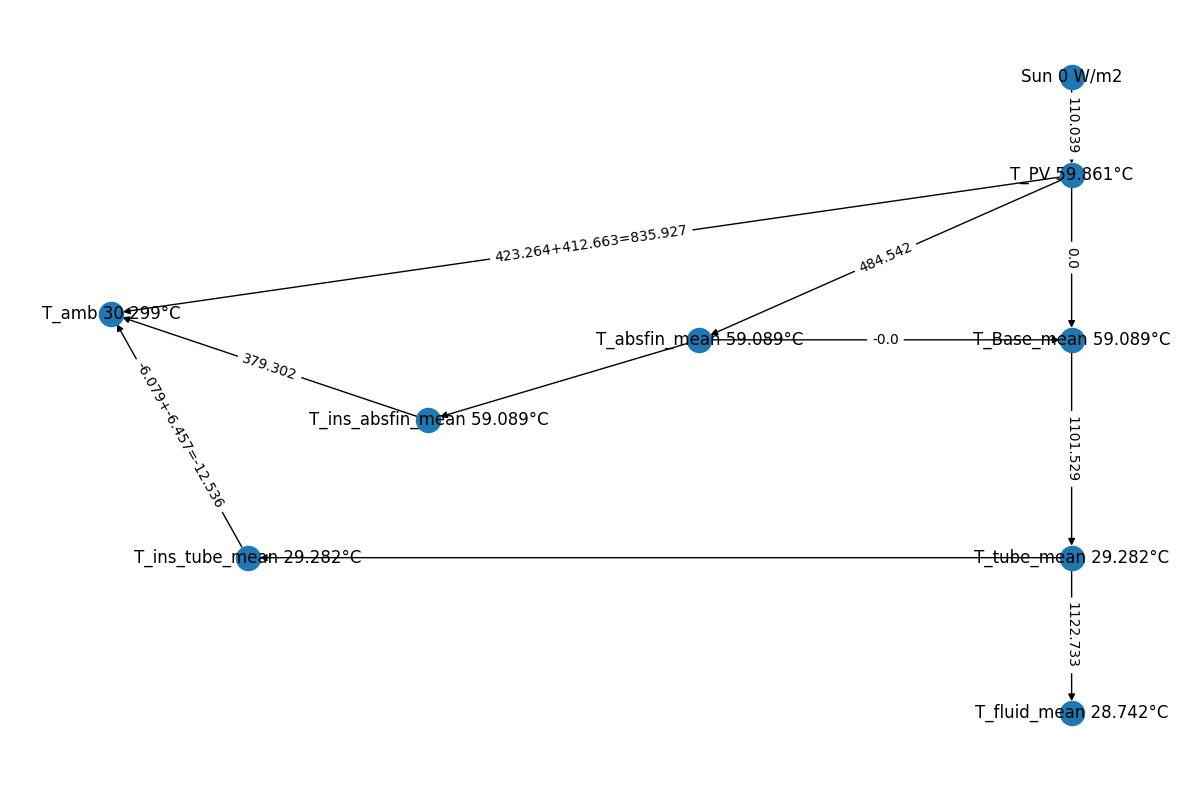

In [9]:
pfun.plot_graph(df_res,par,0)

In [ ]:
u_list

In [ ]:
# powers = ["Q_S","Q_top_conv","Q_top_rad","Q_tube_back_conv","Q_tube_back_rad","Q_f01"]
df_res["-Q_tube_back_conv"] = -df_res["Q_tube_back_conv"]
df_res["-Q_tube_back_rad"] = -df_res["Q_tube_back_rad"]
df_res["-Q_f01"] = -df_res["Q_f01"]

df_select_u = df_res.loc[df_res["u"]==1.89]

powers = ["Q_Base_tube","-Q_tube_back_conv","-Q_tube_back_rad","-Q_f01"]

df_hist = df_select_u

dict_pos = {}
dict_neg = {}
dict_pos_agg = {}
dict_neg_agg = {}

DT_list = []
for DT in df_hist["-(T_m - T_a)"]:
    DT_list.append(-DT)

# powers = ["S_loc","-Q_top_conv","-Q_top_rad","-Q_tube_back"]
# powers = ["S_loc","-Q_top_conv","-Q_top_rad","-Q_fluid_back","-Q_f01"]


for i in range(len(powers)):
    str = powers[i]
    
    dict_pos[str] = np.array(ty.pos_df(df_hist,str))
    dict_neg[str] = np.array(ty.neg_df(df_hist,str))

    if i==0:
        dict_pos_agg[str] = 0*np.array(ty.pos_df(df_hist,str))
        dict_neg_agg[str] = dict_pos_agg[str]

    else:
        dict_pos_agg[str] = dict_pos_agg[powers[i-1]] + dict_pos[powers[i-1]]
        dict_neg_agg[str] = dict_neg_agg[powers[i-1]] + dict_neg[powers[i-1]]

fig, ax = plt.subplots()

width = 0.35

# labels_list = ['Sun','Front convection','Front radiation','Back convection and radiation']
labels_list = powers
colors_list = ['orange','blue','cyan','green']

for i,str in enumerate(powers):
    ax.bar(DT_list, dict_pos[str], width, bottom=dict_pos_agg[str], label=labels_list[i], color=colors_list[i])
    ax.bar(DT_list, dict_neg[str], width, bottom=dict_neg_agg[str], color=colors_list[i])

ax.plot(DT_list,df_hist["Q_tube_fluid"],color="red",label="Q_fluid")
# ax.plot(labels,np.array(N_disp*[list_PL[q]]))

# ax.set_ylabel('PL (Pa)')
# ax.set_title('SPRING')
ax.set_xlabel("Tm - Ta (K)")
ax.set_ylabel("Qdot (W)")
ax.axhline(y = 0., color = 'g', linestyle = '-')
  
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=5)
plt.show()

In [ ]:
par["exchanger"]["N_meander"]*par["exchanger"]["p_ext_tube"]*par["exchanger"]["L_tube"]*12*(24.943-15.014)

In [ ]:
par["exchanger"]["N_meander"]*par["exchanger"]["Heta"]*par["exchanger"]["W"]*150*2*6*(24.943-15.014)

In [ ]:
# X_df.to_csv('V4.41_glass_backsheet_dark_front_calibrage_h.csv',sep=';')

In [ ]:
u_list = list(set(condi["u"]))

fig = go.Figure()

for i in range(len(u_list)):
    # Add traces

    fig.add_trace(go.Scatter(x=-df_res.loc[df_res["u"]==u_list[i]]['-(T_m - T_a)'], y=df_res.loc[df_res["u"]==u_list[i]]['Qdot / AG'],
                        mode = 'markers',
                        name='Model 1D - u = '+str(u_list[i])+' m/s',
                        ))

    
    fig.add_trace(go.Scatter(x=-df_res.loc[df_res["u"]==u_list[i]]['-(T_m - T_a)'], y=sk.comp_power_rG_coeff_df(X_df['Linear fit model 1D'],df_res.loc[df_res["u"]==u_list[i]]),
                        mode = 'lines',
                        line=dict(width=1,
                            dash='dashdot'),
                        name='Linear fit model 1D - u = '+str(u_list[i])+' m/s',
                        ))
    
    fig.add_trace(go.Scatter(x=condi.loc[condi["u"]==u_list[i]]['T_m - T_a'], y=condi.loc[condi["u"]==u_list[i]]['Qdot / AG'],
                        mode = 'markers',
                        name='TUV - u = '+str(u_list[i])+' m/s')
                        )
    
    fig.add_trace(go.Scatter(x=condi.loc[condi["u"]==u_list[i]]['T_m - T_a'], y=sk.comp_power_rG_coeff_df(X_df['TÜV'],condi.loc[condi["u"]==u_list[i]]),
                        mode = 'lines',
                        line=dict(width=1
                            ),
                        name='Linear fit TUV - u = '+str(u_list[i])+' m/s')
                        )
# Set x-axis title
fig.update_xaxes(title_text="T_m - T_amb")
fig.update_yaxes(title_text="Power related to gross (W/m2 coll.)")

fig.update_layout(
    title={
        'text': "Triple Solar Ladnscape dark front wind",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.update_layout(
    autosize=False,
    width=1200,
    height=700,
    margin=dict(
        l=0,
        r=0,
        b=50,
        t=50,
        pad=1
    ),
)

fig.show()

In [ ]:
mse = sklearn.metrics.mean_squared_error(df_res['Qdot / AG'],condi['Qdot / AG'])
print(math.sqrt(mse))
print(math.sqrt(mse)/condi['Qdot / AG'].mean())

In [ ]:
fig.write_html('V4.41_glass_backsheet_dark_front_calibrage_h.html')

In [ ]:
pr.disp_html(df_res)

In [ ]:
[tab,X] = sk.find_SK_SST(condi,par['AG'],columns_list=[0,1,0,1,0,0,0,0,0])
[tab_m,X_m] = sk.find_SK_SST(df_res,par['AG'],columns_list=[0,1,0,1,0,0,0,0,0])

In [ ]:
pr.display_a_i(X)
pr.display_a_i(X_m)

In [ ]:
condi

In [ ]:
pr.disp_html(df_res)

In [ ]:
u_list = [0.7,2.1,3.9]

color_list = ['blue','red','green','orange','cyan','purple']

def lin(x,a,b):
    return a*x+b

popt_mod_list = []
pcov_mod_list = []
popt_tuv_list = []
pcov_tuv_list = []


for i in range(len(u_list)):
    popt,pcov = sco.curve_fit(lin,-df_res.loc[df_res["u"]==u_list[i]]['-(T_m - T_a)'],df_res.loc[df_res["u"]==u_list[i]]['Qdot / AG'])
    popt_mod_list.append(popt)
    pcov_mod_list.append(pcov)

    popt,pcov = sco.curve_fit(lin,condi.loc[condi["u"]==u_list[i]]['T_m - T_a'],condi.loc[df_res["u"]==u_list[i]]['Qdot / AG'])
    popt_tuv_list.append(popt)
    pcov_tuv_list.append(pcov)

fig = go.Figure()

for i in range(len(u_list)):
    # Add traces

    fig.add_trace(go.Scatter(x=-df_res.loc[df_res["u"]==u_list[i]]['-(T_m - T_a)'], y=df_res.loc[df_res["u"]==u_list[i]]['Qdot / AG'],
                        mode = 'markers',
                        marker=dict(color=color_list[2*i]),
                        name='Model 1D - u = '+str(u_list[i])+' m/s')
                        )
    
    fig.add_trace(go.Scatter(x=condi.loc[condi["u"]==u_list[i]]['T_m - T_a'], y=condi.loc[condi["u"]==u_list[i]]['Qdot / AG'],
                        mode = 'markers',
                        marker=dict(color=color_list[2*i+1]),
                        name='TUV - u = '+str(u_list[i])+' m/s')
                        )


    fig.add_trace(go.Scatter(x=-df_res.loc[df_res["u"]==u_list[i]]['-(T_m - T_a)'], y=lin(-df_res.loc[df_res["u"]==u_list[i]]['-(T_m - T_a)'],*popt_mod_list[i]),
                        mode = 'lines',
                        line=dict(color=color_list[2*i], width=1,
                              dash='dashdot'),
                        name='Linear fit model 1D - u = '+str(u_list[i])+' m/s')
                        )
    
    fig.add_trace(go.Scatter(x=condi.loc[condi["u"]==u_list[i]]['T_m - T_a'], y=lin(condi.loc[condi["u"]==u_list[i]]['T_m - T_a'],*popt_tuv_list[i]),
                        mode = 'lines',
                        line=dict(color=color_list[2*i+1], width=1,
                              dash='dashdot'),
                        name='Linear fit TUV - u = '+str(u_list[i])+' m/s')
                        )
# Set x-axis title
fig.update_xaxes(title_text="T_m - T_amb")
fig.update_yaxes(title_text="Power related to gross (W/m2 coll.)")

fig.update_layout(
    title={
        'text': "V4.41 glass-backsheet dark no wind",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.update_layout(
    autosize=False,
    width=1200,
    height=700,
    margin=dict(
        l=0,
        r=0,
        b=50,
        t=50,
        pad=1
    ),
)

fig.show()

In [ ]:
par["l_B"]